# Importa bibliotecas

In [2]:
import pandas as pd
import glob
import numpy as np
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from keras.layers import Dropout
from sklearn.preprocessing import LabelEncoder
from keras.callbacks import EarlyStopping

# Preparando dados

In [3]:
csv_files = glob.glob('/mnt/d/dados_surdos/CSVs/dados_pessoa1_*.csv')

dfs = []
for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    dfs.append(df)

df = pd.concat(dfs, ignore_index=True)
df

,landmark_0_x,landmark_0_y,landmark_0_z,landmark_1_x,landmark_1_y,landmark_1_z,landmark_2_x,landmark_2_y,landmark_2_z,landmark_3_x,...,landmark_18_z,landmark_19_x,landmark_19_y,landmark_19_z,landmark_20_x,landmark_20_y,landmark_20_z,repetition,frame,word
0,-0.018503,0.082473,0.012359,-0.038244,0.052717,-0.003482,-0.041650,0.019357,-0.003818,-0.044734,...,-0.030975,0.015069,0.032954,-0.044006,0.005922,0.042659,-0.027308,0,0.0,amanda
1,-0.019564,0.082302,-0.005283,-0.038287,0.049727,-0.015436,-0.043065,0.016212,-0.010967,-0.043814,...,-0.033387,0.015812,0.032467,-0.046086,0.006886,0.043515,-0.030460,0,1.0,amanda
2,-0.019889,0.083195,0.001091,-0.038524,0.050895,-0.010739,-0.043251,0.017482,-0.007753,-0.044321,...,-0.034229,0.014959,0.033327,-0.046357,0.005194,0.043947,-0.030197,0,2.0,amanda
3,-0.019555,0.083148,-0.000637,-0.038343,0.050427,-0.011885,-0.043177,0.017241,-0.008733,-0.044665,...,-0.034493,0.014198,0.033871,-0.046757,0.004756,0.044371,-0.030852,0,3.0,amanda
4,-0.019964,0.082738,-0.000807,-0.038683,0.050372,-0.012193,-0.043376,0.016974,-0.008550,-0.044471,...,-0.034294,0.014338,0.033735,-0.046465,0.005141,0.044447,-0.030369,0,4.0,amanda
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51483,0.011349,0.065341,0.084823,-0.017376,0.053545,0.053894,-0.034640,0.045996,0.030738,-0.047148,...,-0.012896,0.027197,0.014968,-0.030934,0.018641,0.030711,-0.026710,9,258.0,zimbabwe
51484,0.004704,0.061226,0.090362,-0.020427,0.045916,0.054718,-0.036104,0.040064,0.034361,-0.047177,...,-0.015206,0.026347,0.020924,-0.028964,0.017746,0.035613,-0.025709,9,259.0,zimbabwe
51485,-0.003746,0.038335,0.092386,-0.025580,0.028700,0.057522,-0.034597,0.024798,0.029624,-0.040686,...,-0.009480,0.021108,0.042231,-0.022495,0.009461,0.053696,-0.016306,9,260.0,zimbabwe
51486,0.007986,-0.005878,0.073981,-0.015805,0.001531,0.051905,-0.028627,0.006874,0.038161,-0.037699,...,-0.002449,0.035488,0.015574,-0.010621,0.026830,0.033906,-0.004313,9,261.0,zimbabwe


In [4]:
# Separa features e label
landmark_cols = list(df.columns[:-3])
X = df[landmark_cols].values
y = df['word'].values

print(f'X.shape = {X.shape}')
print(f'y.shape = {y.shape}')


X.shape = (51488, 63)
y.shape = (51488,)


In [5]:
# Encode das labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_encoded

array([ 0,  0,  0, ..., 25, 25, 25])

In [6]:
# Normaliza features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[0.3712917 , 0.90277504, 0.31179218, ..., 0.47981744, 0.7927032 ,
        0.35535334],
       [0.36459633, 0.90182901, 0.1952068 , ..., 0.48624041, 0.79857287,
        0.33564388],
       [0.36254352, 0.90676713, 0.23732652, ..., 0.47496208, 0.80153944,
        0.33728661],
       ...,
       [0.46443989, 0.65879304, 0.84063548, ..., 0.50341124, 0.86842762,
        0.4241568 ],
       [0.53849546, 0.41439133, 0.71900954, ..., 0.61920793, 0.73265164,
        0.49915665],
       [0.64961328, 0.51687206, 0.7236638 , ..., 0.39174057, 0.8440496 ,
        0.64492516]])

In [7]:
'''
Separa dados em treino, teste e validação
  - treino    -> repeticoes 0 a 4
  - teste     -> repeticoes 5 a 7
  - validação -> repeticoes 8 a 9
'''

train_mask = df['repetition'].isin([0, 1, 2, 3, 4])
test_mask = df['repetition'].isin([5, 6, 7])
val_mask = df['repetition'].isin([8, 9])

X_train = X_scaled[train_mask]
X_test = X_scaled[test_mask]
X_val = X_scaled[val_mask]

y_train = y_encoded[train_mask]
y_test = y_encoded[test_mask]
y_val = y_encoded[val_mask]

# Reshape dos dados para o input da RNN (samples, time_steps, features)
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
X_val = X_val.reshape(X_val.shape[0], 1, X_val.shape[1])

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")
print(f"Validation data shape: {X_val.shape}")

Training data shape: (25900, 1, 63)
Testing data shape: (13627, 1, 63)
Validation data shape: (11961, 1, 63)


# Criando o modelo

In [8]:
num_classes = 26 # palavras/labels
input_shape = (1, X_train.shape[2])  # (time_steps, features)

In [9]:
model = Sequential()
model.add(SimpleRNN(500, input_shape=input_shape, return_sequences=True))
model.add(Dropout(0.2))
model.add(SimpleRNN(250))
model.add(Dropout(0.2))
model.add(Dense(125, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()

2025-06-03 15:57:57.537048: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/home/victor/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 1, 500)         │       282,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 500)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 250)            │       187,750 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 250)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 125)            │        31,375 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 26)             │         3,276 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 504,401 (1.92 MB)

 Trainable params: 504,401 (1.92 MB)

 Non-trainable params: 0 (0.00 B)

# Treinamento

In [10]:
# Early Stopping
callback = EarlyStopping(monitor="val_loss", mode="min", patience=5)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    verbose=1,
    callbacks=[callback]
)

Epoch 1/50
810/810 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.1646 - loss: 2.8042 - val_accuracy: 0.2742 - val_loss: 2.3619
Epoch 2/50
810/810 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.4023 - loss: 1.8240 - val_accuracy: 0.3547 - val_loss: 2.1924
Epoch 3/50
810/810 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.4850 - loss: 1.5455 - val_accuracy: 0.3689 - val_loss: 2.2896
Epoch 4/50
810/810 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5349 - loss: 1.3873 - val_accuracy: 0.4210 - val_loss: 1.9973
Epoch 5/50
810/810 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5722 - loss: 1.2756 - val_accuracy: 0.4225 - val_loss: 2.1094
Epoch 6/50
810/810 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.6048 - loss: 1.1747 - val_accuracy: 0.4476 - val_loss: 2.0813
Epoch 7/50
810/810 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.6235 - loss: 1.1200 - val_accuracy: 0.4396 - val_loss: 2.0463
Epoch 8/50
810/810 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.6323 - loss: 1.0810 - val_accuracy: 0.

# Avaliação do modelo

In [11]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest accuracy: {test_accuracy:.4f}")


Test accuracy: 0.4972


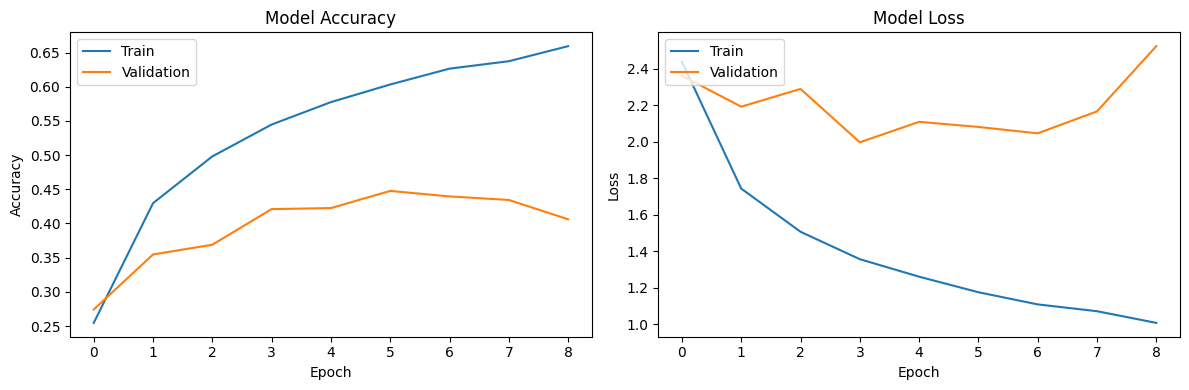

In [12]:
# Plot historico de treinamento
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()